In [21]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=141564 sha256=6cb14bc896839dc45b1c819821a2b8527e76f5cb1978358426394bc287cdb6c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-cj48ltqa/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Temporal Network Analysis: High School Dataset, Interactions among Students

First, we download and parse the [High School 2013 dataset](http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/). It is the temporal network of interactions between students of 5 classes during 7 days in a high school in Marseille, France in 2013. An interaction consists in a physical proximity between two students, captured by a sensor.

In [3]:
import urllib.request
import gzip

def download(url, file_name):
    # get request
    with urllib.request.urlopen(url) as response:
        # uncompress file
        with gzip.GzipFile(fileobj=response) as uncompressed, open(file_name, 'wb') as out_file:
            file_content = uncompressed.read()
            out_file.write(file_content)

In [4]:
url = "http://www.sociopatterns.org/wp-content/uploads/2015/07/High-School_data_2013.csv.gz"
file_name = "high_school_2013.csv"
download(url, file_name)

In [5]:
entry_format = {"u_pos": 1, "v_pos": 2, "t_pos": 0}
config = {"delimiter": " ", "ignore_header": False, "nodes_to_label": True, "time_is_datetime": False,
          "link_duration": 60, "is_link_stream": True}
sg.sort_csv(file_name, entry_format, **config)
S = sg.parser(input_file=file_name,
           input_format='csv',
           entry_format=entry_format,
           output_file="high_school_2013",
           output_format='sg',
           **config)

Writing CSV: 100%|█████████████████| 188508/188508 [00:00<00:00, 1164509.25it/s]
Parsing CSV: 188508it [00:00, 434648.68it/s]                                    


In [3]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


In [18]:
import numpy
T = [0, 50]
nb_node = 8
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 100

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15
p_link = numpy.sqrt(nb_node)/nb_node
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  8
Nb of segmented nodes :  8.0
Nb of links :  14
Nb of segmented links :  23.0
Nb of event times :  41


<AxesSubplot:xlabel='t', ylabel='Nodes'>

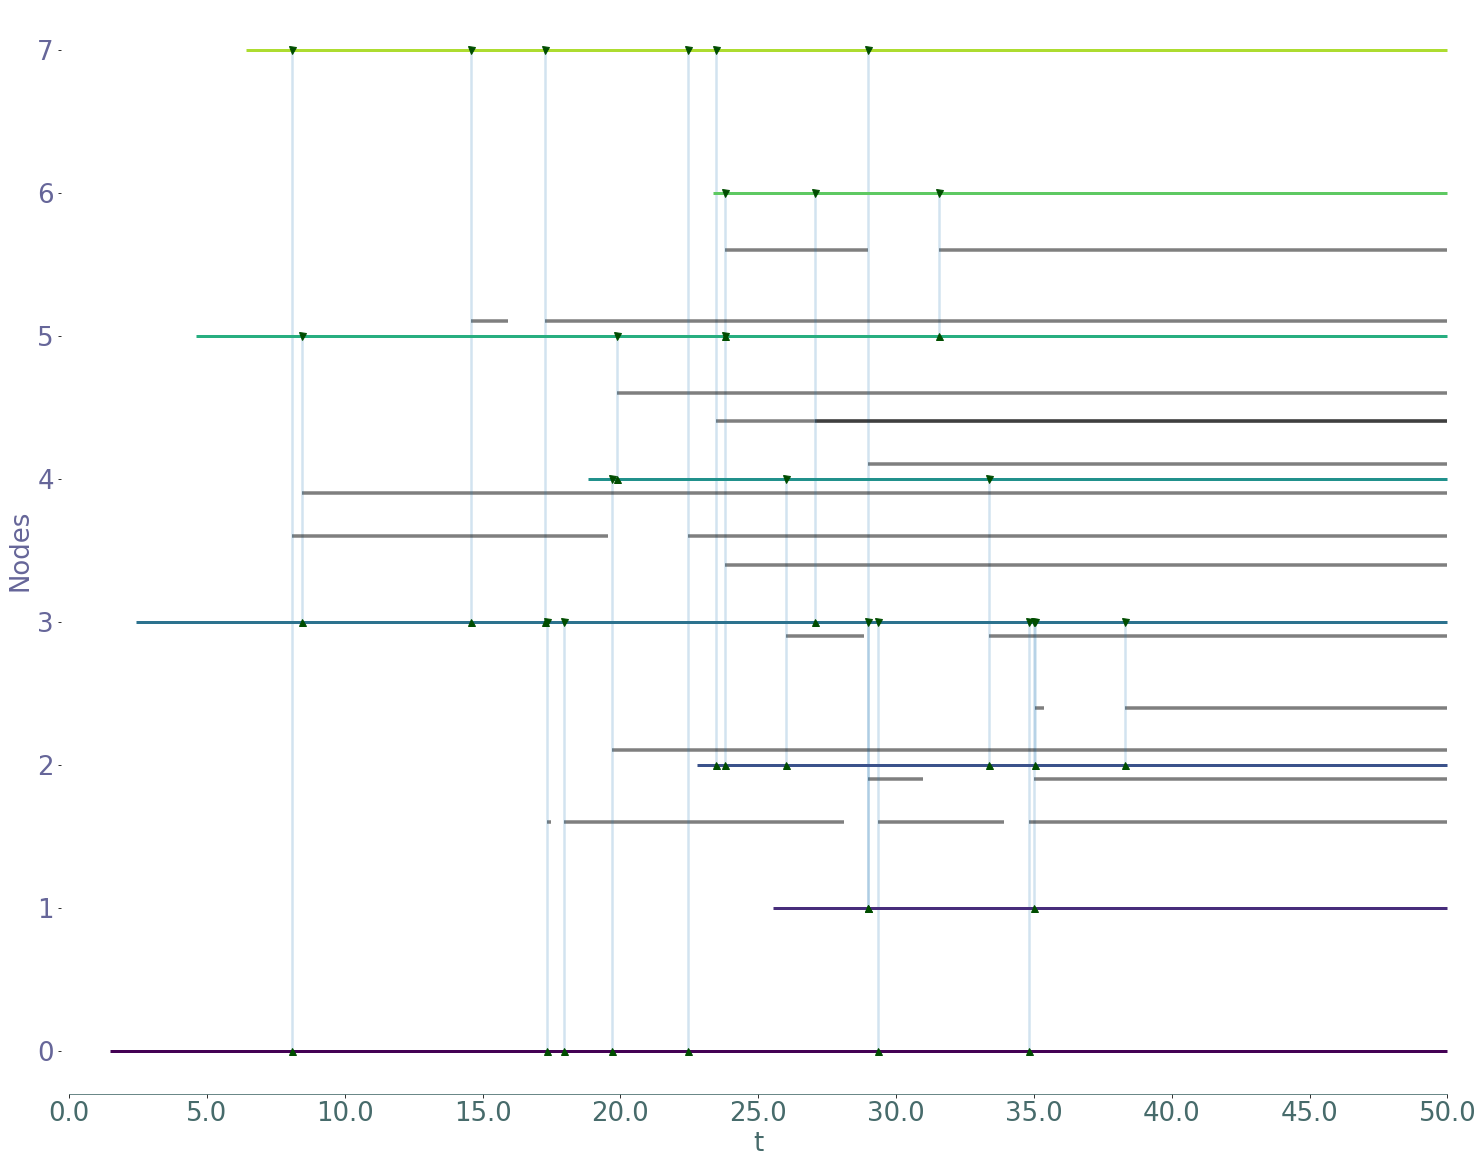

In [19]:
S.plot()

In [20]:
import straph.betweenness as bt
bet, contri, nouveau, events= bt.betweenness_all(S)

0
1
2
3
4
5
6
7


In [21]:
bet

{0: {1.4887665926418159: 0,
  2.449424783212273: 0,
  4.607302210760117: 0,
  6.421477139102738: 0,
  8.090865201369889: 0.0,
  8.459789271373008: 0.0,
  14.577724921553939: 0.0,
  15.90655102361146: 0.0,
  17.27679980236987: 0.0,
  17.339216632008362: 0.0,
  17.48180755132346: 0.0,
  17.950618108751275: 0.0,
  18.83472089076026: 0.0,
  19.552779885065412: 100.55701163952294,
  19.685857251947525: 100.55701163952294,
  19.863800987591883: 0.0,
  22.469209157520428: 0.0,
  22.78560432992383: 0.0,
  23.34837494574738: 0.0,
  23.46732875916976: 0.0,
  23.80933536988681: 0.0,
  23.811457009802922: 0.0,
  25.55022829111434: 0.0,
  26.0095005489242: 0.0,
  27.053489040097517: 0.0,
  28.10662198696172: 0.0,
  28.849493018217906: 0.0,
  28.966142556441092: 0.0,
  28.982068634196093: 0.0,
  28.9832149210485: 0.0,
  29.347135871960592: 0.0,
  30.983534472626427: 0.0,
  31.544350182914442: 0.0,
  33.388861628471616: 0.0,
  33.915589675155935: 0.0,
  34.80490218131198: 0.18879677637713196,
  35.01

Let's print a short description of this dataset.

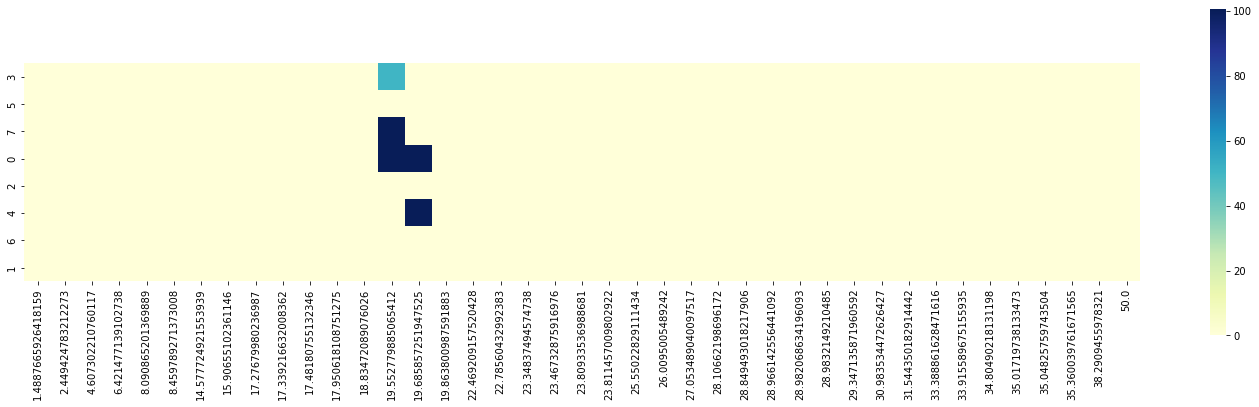

In [22]:
ax = bt.heatmap_betweenness(nouveau, events, bet)
fig = ax.get_figure()
fig.savefig("out.png") 

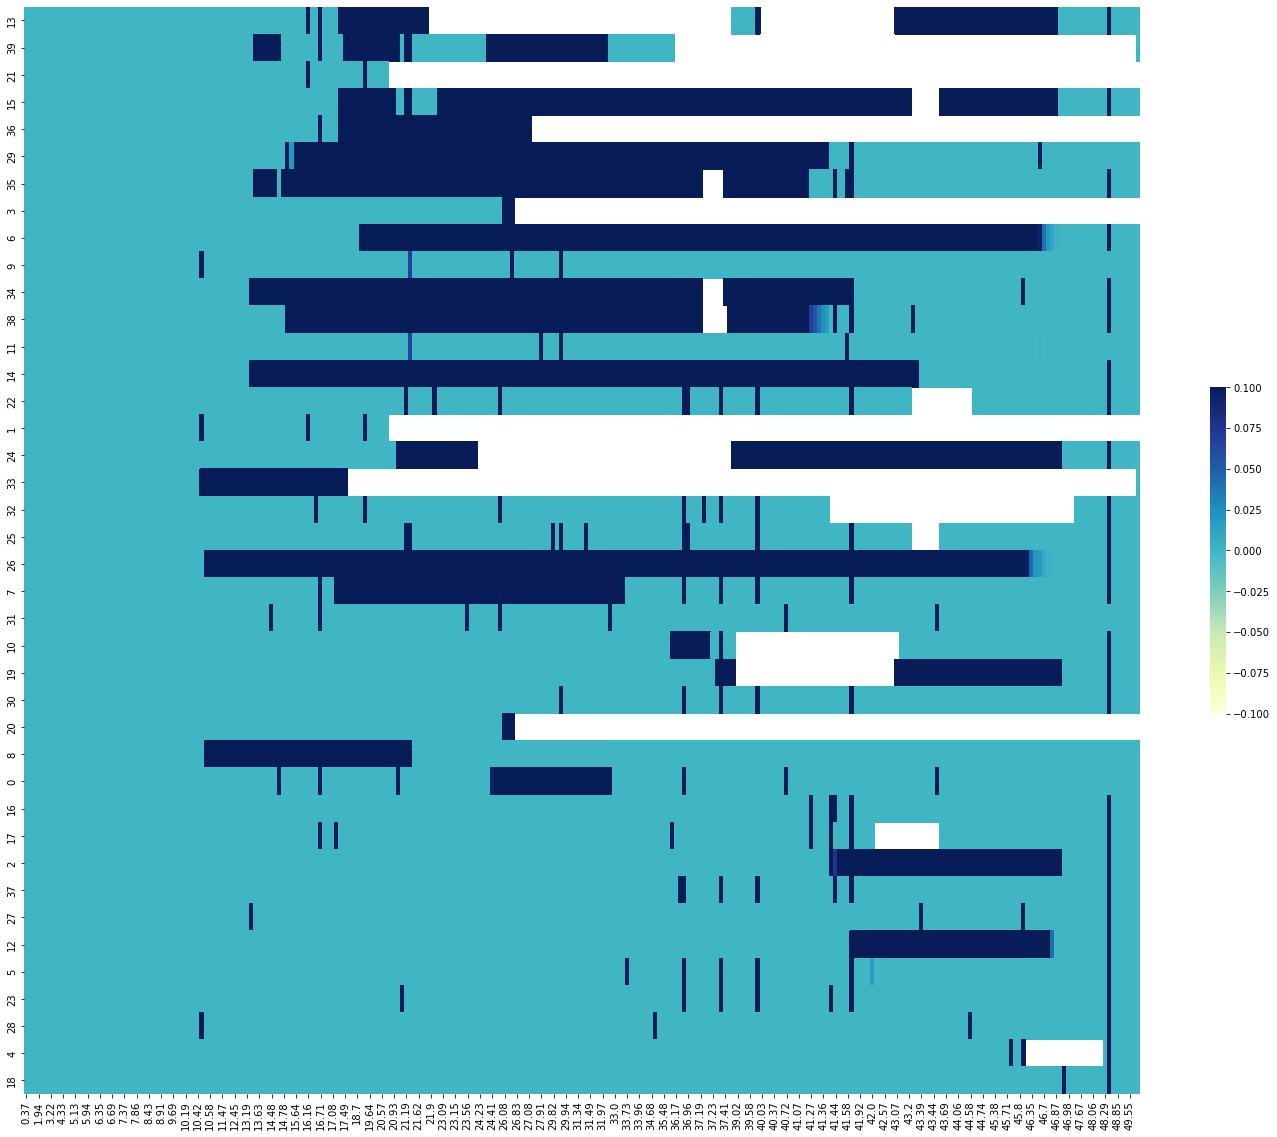

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
d = nouveau.degrees()
deg_increa = list(map( lambda x : (d[x], x) , list(d) ))
deg_increa.sort()
deg_increa.reverse()
l = [ [ bet[y][t] for t in events ] for x,y in deg_increa  ]
a = np.matrix(l)
df_cm = pd.DataFrame(a, index = [nouveau.node_to_label[v] for _,v in deg_increa], columns = [round(t,2) for t in events])
ax = sns.heatmap(df_cm,cmap="YlGnBu", cbar_kws={"shrink": 0.3})

There's $327$ students interacting $46025$ times among each other at $7360$ distinct event times. Let's learn more.

In [ ]:
import os
os.remove("high_school_2013.csv")